In [9]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt 

# loading dataset in custom generators
directory = './Gender_Classifier/Gender_Classification_Images/faces/Real_Images/train/'
men_images=(cv2.imread(file) for file in glob.glob(directory + 'man/*.jpg'))
women_images=(cv2.imread(file) for file in glob.glob(directory + 'woman/*.jpg'))


class Image_Quality:                           #Parent Class
    
    def __init__(self, image):
        
        """ 
        
        :param image: image returned by the generator
        
        """
        self.image = image
        
    #  Function to check the quality of images and the histogram of their pixels    
    def img_and_hist(self):                    
        
        try:
            # Flatten the image pixel and separate into bins       
            hist,bins = np.histogram(self.image.flatten(),256,[0,256])

            # Obtain pixels cummulative frequencies after binning        
            cdf = hist.cumsum()
            cdf_normalized = cdf * float(hist.max()) / cdf.max()

            print(self.image.shape)
            x_axis = np.arange(256)

            # Plot the image side by side with the pixel histogram        
            fig = plt.figure(figsize=(12,6))
            fig.add_subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
            plt.axis("off")

            fig.add_subplot(1, 2, 2)
            plt.plot(cdf_normalized, color = 'b')
            plt.hist(self.image.flatten(),256,[0,256], color = 'r')
            plt.xlim([0,256])
            plt.legend(('cdf','histogram'), loc = 'upper left')
            plt.show()
        
        except AttributeError:
            print('Attribute Error: Please set next(image_generator) in the Image_Quality argument')

        
class Enhance_Image(Image_Quality):
    
    #  Inherit parent class instance variable    
    def __init__(self, image):
        super().__init__(image)
        self.img_and_hist()
    
    # Function to perform histogram equalization on image and display output    
    def hist_eqn(self):
        
        image_hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)

        h,s,v = cv2.split(image_hsv)
        v = cv2.equalizeHist(v)

        merged_hsv = cv2.merge((h,s,v))
        HE_enhanced = cv2.cvtColor(merged_hsv, cv2.COLOR_HSV2BGR)

        Image_Quality(HE_enhanced).img_and_hist()
            
            
    # Function to perform contrast limited adaptive histogram equalizer
    def clahe(self):
        
        image_hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
        h,s,v = cv2.split(image_hsv)

        clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
        v = clahe.apply(v)

        hsv_img = cv2.merge((h,s,v))
        clahe_enhanced = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

        Image_Quality(clahe_enhanced).img_and_hist()
            
            
# If yes to any enhancement technique, save the enhanced images in a directory

class Save:
    
    def __init__(self, image_generator):
    
        self.image_generator = image_generator
    
    def save_pic(self, kind, gender, n=0):
        
        self.kind = kind
        self.gender = gender
        self.n = n
        
        # Iterates over enhanced images and saves them in a designated directory
        for img in self.image_generator:
            
            PATH = './Gender_Classifier/Gender_Classification_Images/faces/Enhanced_Images/train/'
            
            image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            h,s,v = cv2.split(image_hsv)
            
            if self.kind == 'hist_eqn':
                
                v = cv2.equalizeHist(v)
                merged_hsv = cv2.merge((h,s,v))
                HE_enhanced = cv2.cvtColor(merged_hsv, cv2.COLOR_HSV2BGR)
                
                if self.gender == 'male':
                    
                    cv2.imwrite(PATH + f'man/man_{self.n}.jpg', HE_enhanced)
                    
                elif self.gender == 'female':
                    
                    cv2.imwrite(PATH + f'woman/woman_{self.n}.jpg', HE_enhanced)
                
            elif self.kind == 'clahe':
                
                clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
                v = clahe.apply(v)
                hsv_img = cv2.merge((h,s,v))
                clahe_enhanced = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)
                
                if self.gender == 'male':
                    
                    cv2.imwrite(PATH + f'man/man_{self.n}.jpg', clahe_enhanced)
                
                elif gender == 'female':
                    cv2.imwrite(PATH + f'woman/woman_{self.n}.jpg', clahe_enhanced)
            
            self.n += 1

(170, 121, 3)


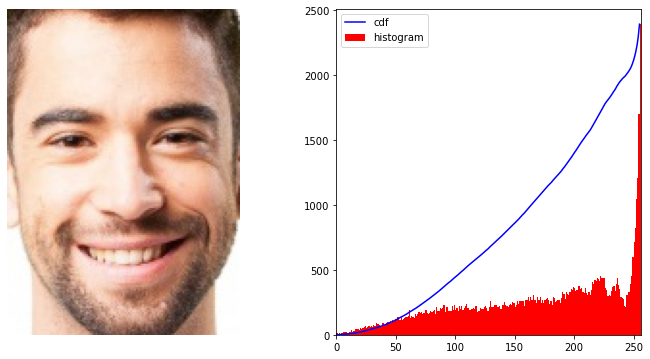

(170, 121, 3)


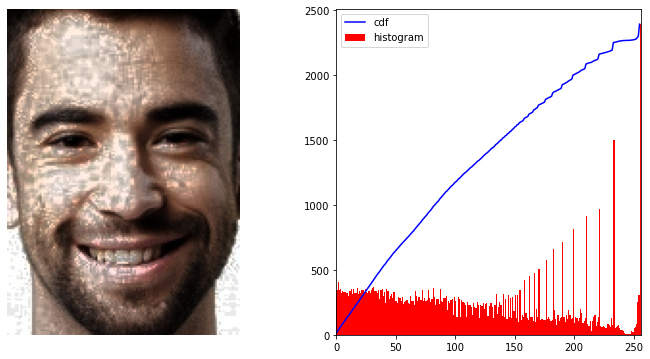

In [8]:
# a = Image_Quality('next(men_images)')
# a.img_and_hist()

Enhance_Image(next(men_images)).hist_eqn()

(170, 121, 3)


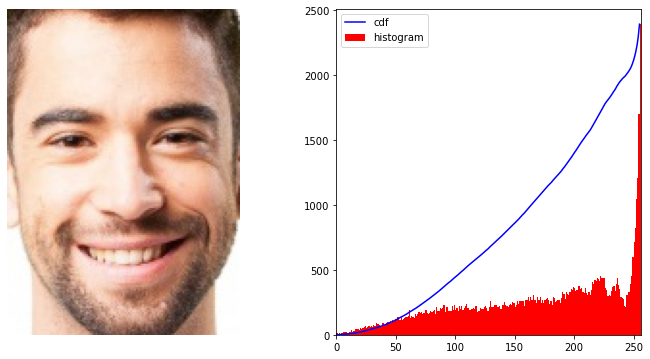

(170, 121, 3)


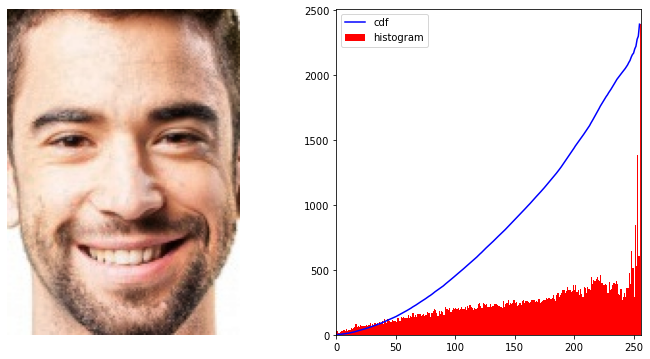

In [10]:
Enhance_Image(next(men_images)).clahe()